In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

import main

In [13]:
result = main.run(total_periods = 1000000, alpha = 0.125, gamma = 0.95, beta = 1*1e-5, lambda0=1000, lambda1=0.9995)

  1%|          | 12322/1000000 [00:02<03:55, 4195.86it/s]


In [3]:
result.print_results()

  Bertrand Price    Monopoly Price    Bertrand Profit    Monopoly Profit
----------------  ----------------  -----------------  -----------------
         1.47292           1.92498           0.222925            0.33749
Name                      Average Price    Average Profit    Normalised Profit
----------------------  ---------------  ----------------  -------------------
Binary_State_QLearning          1.69735          0.304868             0.715253
Binary_State_QLearning          1.69781          0.304387             0.711055
Name                    Description
----------------------  --------------------------------------------------------------------------------------------------
Binary_State_QLearning  : quality=2, mc=1, alpha=0.125, gamma=0.95, policy = (Boltzmann: lambda0 = 1000, lambda1 = 0.9995)
Binary_State_QLearning  : quality=2, mc=1, alpha=0.125, gamma=0.95, policy = (Boltzmann: lambda0 = 1000, lambda1 = 0.9995)




# Checking initial Q matrix vs final Q matrix for Binary State Q learning


In [5]:
init_Q1 = result.env.agents[0].Q_just_initialised
init_Q2 = result.env.agents[1].Q_just_initialised
final_Q1 = result.env.agents[0].Q
final_Q2 = result.env.agents[1].Q


In [6]:
init_Q1

{(0, 0, 0, 0): {1.4729218286936814: 0.8844163846593405,
  1.9249809389308554: 0.7376206933253188},
 (0, 0, 0, 1): {1.4729218286936814: 0.0917622947761425,
  1.9249809389308554: 0.09456909261384061},
 (0, 0, 1, 0): {1.4729218286936814: 0.566986975609242,
  1.9249809389308554: 0.3251816622228245},
 (0, 0, 1, 1): {1.4729218286936814: 0.001385254274854919,
  1.9249809389308554: 0.5028009322501535},
 (0, 1, 0, 0): {1.4729218286936814: 0.7291505516654443,
  1.9249809389308554: 0.8321148145748779},
 (0, 1, 0, 1): {1.4729218286936814: 0.6317114985921672,
  1.9249809389308554: 0.9855051013996233},
 (0, 1, 1, 0): {1.4729218286936814: 0.805610107207538,
  1.9249809389308554: 0.8638733698581578},
 (0, 1, 1, 1): {1.4729218286936814: 0.022314765503443135,
  1.9249809389308554: 0.8033327680394721},
 (1, 0, 0, 0): {1.4729218286936814: 0.511109747929938,
  1.9249809389308554: 0.5497198054102299},
 (1, 0, 0, 1): {1.4729218286936814: 0.12089458513463558,
  1.9249809389308554: 0.7878125135764479},
 (1, 0,

In [7]:
final_Q1

{(0, 0, 0, 0): {1.4729218286936814: 0.090225424953685,
  1.9249809389308554: 0.09022480665299594},
 (0, 0, 0, 1): {1.4729218286936814: 0.17343527768932,
  1.9249809389308554: 0.17343401310638992},
 (0, 0, 1, 0): {1.4729218286936814: 0.13525068311338062,
  1.9249809389308554: 0.13524978101205945},
 (0, 0, 1, 1): {1.4729218286936814: 0.15561551344707655,
  1.9249809389308554: 0.15561457298989498},
 (0, 1, 0, 0): {1.4729218286936814: 0.158197796040501,
  1.9249809389308554: 0.1582246366359633},
 (0, 1, 0, 1): {1.4729218286936814: 0.09907934592099057,
  1.9249809389308554: 0.09909628812071579},
 (0, 1, 1, 0): {1.4729218286936814: 0.10640253909910774,
  1.9249809389308554: 0.106422525518125},
 (0, 1, 1, 1): {1.4729218286936814: 0.14464748524588636,
  1.9249809389308554: 0.1446738411480926},
 (1, 0, 0, 0): {1.4729218286936814: 0.20328793306885445,
  1.9249809389308554: 0.20328906474004832},
 (1, 0, 0, 1): {1.4729218286936814: 0.15034822265153427,
  1.9249809389308554: 0.1503488771763432},
 (

In [10]:
init_Q1 = result.env.agents[0].Q_just_initialised
init_Q2 = result.env.agents[1].Q_just_initialised

final1=0
final2=0

for state, action in init_Q1.items():
    if list(action.values())[0] < list(action.values())[1]:
        final1+=1
for state, action in init_Q2.items():
    if list(action.values())[0] < list(action.values())[1]:
        final2+=1
print("number of Q values at the start of experiment that are higher for Monopoly Price")
print("agent 1: ", final1, "agent 2: ", final2)

number of Q values at the start of experiment that are higher for Monopoly Price
agent 1:  12 agent 2:  7


In [11]:
final_Q1 = result.env.agents[0].Q
final_Q2 = result.env.agents[1].Q

final1=0
final2=0
for state, action in final_Q1.items():
    if list(action.values())[0] < list(action.values())[1]:
        final1+=1
for state, action in final_Q2.items():
    if list(action.values())[0] < list(action.values())[1]:
        final2+=1
print("number of Q values after end of experiment that are higher for Monopoly Price")
print("final 1: ", final1, "final 2: ", final2)

number of Q values after end of experiment that are higher for Monopoly Price
final 1:  12 final 2:  8


In [10]:
for i in range(len(result.normalised_profits_time_series)):
    comparison = result.normalised_profits_time_series[i] == np.array([1,1])
    if comparison.all():
        print(i)
        

3
8
14
15
21
27
28
35
59
61
63
76
77
87
89
90
92
96
98
102
107
108
110
112
113
114
117
118
125
129
139
147
148
151
152
153
160
163
164
168
171
175
186
188
193
203
209
211
216
222
231
241
246
254
268
269
272
285
288
296
297
301
303
304
319
322
323
325
329
332
338
340
351
358
359
365
368
370
376
377
382
384
387
389
391
401
405
406
409
414
418
419
420
426
435
442
443
450
452
456
461
467
474
478
486
487
489
491
494
496
498
510
512
513
514
516
517
529
531
533
535
542
543
544
545
547
551
553
554
555
556
557
559
570
574
580
583
585
587
595
599
604
606
607
612
615
618
619
621
624
626
631
633
634
635
638
640
647
648
652
656
658
659
660
662
664
666
667
672
674
681
683
686
688
692
695
699
702
718
719
722
726
727
731
736
739
755
756
757
760
761
762
764
766
769
775
777
779
780
795
803
805
815
816
820
821
827
840
843
845
847
853
859
865
867
871
876
877
878
879
881
883
891
892
895
898
909
912
913
916
919
920
923
929
933
938
940
945
948
955
958
963
964
967
970
971
972
980
983
986
993
997
1000
1001
100

7014
7018
7022
7023
7024
7026
7037
7039
7044
7048
7049
7052
7058
7060
7062
7063
7064
7069
7073
7074
7075
7078
7080
7087
7091
7095
7098
7102
7108
7112
7119
7121
7122
7125
7128
7132
7133
7134
7142
7146
7149
7154
7159
7163
7164
7168
7170
7172
7176
7180
7184
7189
7190
7199
7208
7215
7216
7218
7220
7225
7226
7228
7232
7234
7243
7244
7246
7248
7250
7254
7260
7262
7265
7269
7270
7272
7275
7281
7284
7286
7289
7292
7295
7298
7305
7310
7312
7315
7318
7331
7332
7336
7338
7339
7344
7350
7351
7352
7353
7356
7361
7362
7363
7369
7370
7371
7372
7373
7375
7378
7379
7388
7389
7396
7399
7401
7403
7405
7408
7412
7422
7423
7427
7433
7435
7438
7442
7443
7446
7449
7453
7454
7457
7459
7466
7469
7471
7473
7476
7491
7492
7496
7498
7505
7510
7511
7515
7518
7522
7534
7542
7543
7546
7551
7552
7555
7556
7564
7565
7567
7570
7575
7576
7579
7582
7587
7588
7595
7597
7600
7606
7607
7616
7617
7618
7622
7623
7635
7640
7641
7644
7645
7657
7663
7664
7668
7669
7672
7676
7678
7696
7698
7700
7701
7704
7705
7708
7709
7712
7715


14497
14500
14502
14504
14507
14513
14526
14532
14535
14543
14563
14569
14572
14573
14575
14577
14585
14592
14597
14605
14607
14608
14611
14612
14620
14623
14626
14627
14634
14638
14655
14656
14658
14666
14678
14688
14691
14697
14698
14699
14702
14706
14710
14711
14713
14720
14721
14722
14739
14741
14744
14746
14765
14767
14771
14778
14794
14800
14803
14805
14808
14814
14824
14827
14829
14839
14848
14853
14854
14855
14857
14869
14871
14877
14878
14879
14891
14894
14901
14913
14914
14916
14917
14931
14948
14949
14950
14951
14954
14959
14964
14965
14966
14970
14971
14992
14993
14996
15001
15004
15021
15024
15025
15031
15035
15036
15045
15051
15059
15061
15062
15065
15094
15129
15130
15140
15149
15150
15159
15160
15177
15183
15215
15251
15252
15307
15462
15465
15469
15472
15897
15927
16282
17287
17290
17429
17430
17499
18258
19100
24662
26082


# Price History of Agents

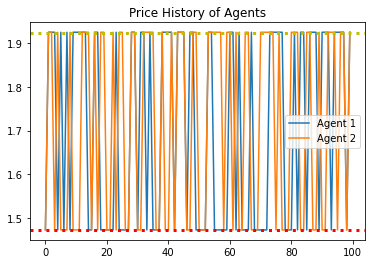

In [4]:
agent_1 = np.array(result.price_history)[-100:,0]
agent_2 = np.array(result.price_history)[-100:,1]
df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.plot(df)
plt.axhline(y=1.924, linewidth=3,color='y',linestyle="dotted")
plt.axhline(y=1.472, linewidth=3,color='r',linestyle="dotted")
plt.legend(['Agent 1', "Agent 2"])
plt.title("Price History of Agents")
plt.show()

# Reward history of agents

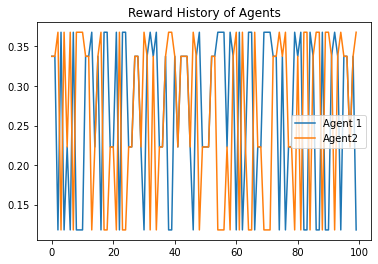

In [5]:
agent_1 = np.array(result.reward_history)[-100:,0]
agent_2 = np.array(result.reward_history)[-100:,1]
df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.plot(df)
plt.legend(['Agent 1', "Agent2"])
plt.title("Reward History of Agents")
plt.show()

# Time Series of Normalized Profits

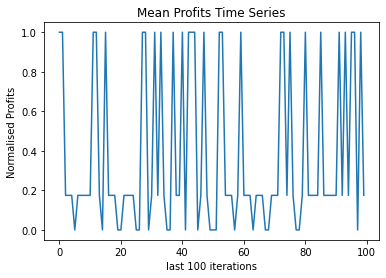

In [11]:
mean_profits = np.array(result.normalised_profits_time_series)[-100:].mean(axis=1)
df = pd.DataFrame({'mean profits': mean_profits})
plt.plot(df)
plt.title("Mean Profits Time Series")
plt.ylabel("Normalised Profits")
plt.xlabel("last 100 iterations")
plt.show()

# keys with highest Qvalue average sorted

In [13]:
actions = result.env.action_space
new_dict1 = {}
new_dict2={}
for a in actions:
    new_dict1[a]=0
    new_dict2[a]=0

for state,action_space in result.env.agents[0].Q.items():
    for a in actions:
        new_dict1[a] += action_space[a]
        
for key,value in new_dict1.items():
    new_dict1[key] = new_dict1[key]/(len(actions)**2)

"""
for state,action_space in result.env.agents[1].Q.items():
    for a in actions:
        new_dict2[a] += action_space[a]
        
for key,value in new_dict2.items():
    new_dict2[key] = new_dict2[key]/(len(actions)**2)
"""
print(sorted(new_dict1, key=lambda k: new_dict1[k],reverse=True))
#print(sorted(new_dict2, key=lambda k: new_dict2[k],reverse=True))

[1.4660731301561347, 1.6523757330810418, 1.6058000823498149, 1.5592244316185881, 1.5126487808873614, 1.6989513838122683, 1.3729218286936813, 1.7455270345434952, 1.7921026852747217, 1.419497479424908, 1.931829637468402, 1.8852539867371751, 1.9784052881996288, 1.8386783360059487, 2.0249809389308555]


In [14]:
actions = result.env.action_space
new_dict1 = {}
new_dict2={}
for a in actions:
    new_dict1[a]=0
    new_dict2[a]=0

for state,action_space in result.env.agents[0].Q.items():
    for a in actions:
        if action_space[a] != 0:
            print(state, a, action_space[a])

(1.3729218286936813, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.3729218286936813 3.462908138597343
(1.3729218286936813, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.419497479424908 4.092027301301694
(1.3729218286936813, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.4660731301561347 6.352272745964035
(1.3729218286936813, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.5126487808873614 4.282662139619644
(1.3729218286936813, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.5592244316185881 4.87726179659687
(1.3729218286936813, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.6058000823498149 4.398717932758257
(1.3729218286936813, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.6523757330810418 4.264148618778733
(1.3729218286936813, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.6989513838122683 3.3741111106515045
(1.3729218286936813, 1.6989513838122683, 1.37292182869368

(1.419497479424908, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.6523757330810418 2.9946481922703185
(1.419497479424908, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.6989513838122683 2.9290913880166407
(1.419497479424908, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.7455270345434952 6.173617328827245
(1.419497479424908, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.7921026852747217 2.9685396565444178
(1.419497479424908, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.8386783360059487 1.3800281029995793
(1.419497479424908, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.8852539867371751 1.8267871664073616
(1.419497479424908, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.931829637468402 1.6007873456159625
(1.419497479424908, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.9784052881996288 2.339797380660425
(1.419497479424908, 1.6989513838122683, 1.931829637468402, 1.698951

(1.5126487808873614, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.8852539867371751 1.7984562370162966
(1.5126487808873614, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.931829637468402 0.7227072712409901
(1.5126487808873614, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.9784052881996288 0.2095063845685473
(1.5126487808873614, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 2.0249809389308555 1.0156054723307704
(1.5126487808873614, 1.6989513838122683, 1.8852539867371751, 1.6989513838122683) 1.3729218286936813 3.2016813133132067
(1.5126487808873614, 1.6989513838122683, 1.8852539867371751, 1.6989513838122683) 1.419497479424908 4.420830840162027
(1.5126487808873614, 1.6989513838122683, 1.8852539867371751, 1.6989513838122683) 1.4660731301561347 4.077554229975742
(1.5126487808873614, 1.6989513838122683, 1.8852539867371751, 1.6989513838122683) 1.5126487808873614 6.3730277340991215
(1.5126487808873614, 1.6989513838122683, 1.885253986

(1.5592244316185881, 1.6989513838122683, 2.0249809389308555, 1.6989513838122683) 2.0249809389308555 2.1246586231774622
(1.6058000823498149, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.3729218286936813 2.0002247925264918
(1.6058000823498149, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.419497479424908 1.5895046070841832
(1.6058000823498149, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.4660731301561347 3.379909914841439
(1.6058000823498149, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.5126487808873614 2.3811077360680075
(1.6058000823498149, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.5592244316185881 4.214044495245256
(1.6058000823498149, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.6058000823498149 6.371283912904863
(1.6058000823498149, 1.6989513838122683, 1.3729218286936813, 1.6989513838122683) 1.6523757330810418 3.37510268505944
(1.6058000823498149, 1.6989513838122683, 1.37292182869

(1.6523757330810418, 1.6989513838122683, 1.7921026852747217, 1.6989513838122683) 2.0249809389308555 4.718071828933808
(1.6523757330810418, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.3729218286936813 2.255350023190116
(1.6523757330810418, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.419497479424908 3.915261924749334
(1.6523757330810418, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.4660731301561347 3.875238924281796
(1.6523757330810418, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.5126487808873614 4.0751714785477136
(1.6523757330810418, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.5592244316185881 1.7230183554746819
(1.6523757330810418, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.6058000823498149 6.369701327086688
(1.6523757330810418, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.6523757330810418 4.0875296831877055
(1.6523757330810418, 1.6989513838122683, 1.83867833600

(1.7455270345434952, 1.6989513838122683, 1.419497479424908, 1.6989513838122683) 1.8852539867371751 4.859618768818748
(1.7455270345434952, 1.6989513838122683, 1.419497479424908, 1.6989513838122683) 1.931829637468402 5.561116087742739
(1.7455270345434952, 1.6989513838122683, 1.419497479424908, 1.6989513838122683) 1.9784052881996288 5.36366006573148
(1.7455270345434952, 1.6989513838122683, 1.419497479424908, 1.6989513838122683) 2.0249809389308555 6.249168157454219
(1.7455270345434952, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.3729218286936813 4.611301294695344
(1.7455270345434952, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.419497479424908 4.851955631289596
(1.7455270345434952, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.4660731301561347 4.901753125172653
(1.7455270345434952, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.5126487808873614 4.516117843747182
(1.7455270345434952, 1.6989513838122683, 1.4660731301561347, 1.

(1.8386783360059487, 1.6989513838122683, 1.419497479424908, 1.6989513838122683) 1.8386783360059487 3.0555225781977753
(1.8386783360059487, 1.6989513838122683, 1.419497479424908, 1.6989513838122683) 1.8852539867371751 2.6757739166259187
(1.8386783360059487, 1.6989513838122683, 1.419497479424908, 1.6989513838122683) 1.931829637468402 1.6082787666172917
(1.8386783360059487, 1.6989513838122683, 1.419497479424908, 1.6989513838122683) 1.9784052881996288 3.6132920892152187
(1.8386783360059487, 1.6989513838122683, 1.419497479424908, 1.6989513838122683) 2.0249809389308555 2.8148496265676037
(1.8386783360059487, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.3729218286936813 4.635245381713137
(1.8386783360059487, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.419497479424908 2.5853696743841943
(1.8386783360059487, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.4660731301561347 4.602807551614972
(1.8386783360059487, 1.6989513838122683, 1.46607313015613

(1.8852539867371751, 1.6989513838122683, 1.7921026852747217, 1.6989513838122683) 1.7921026852747217 2.58048295139381
(1.8852539867371751, 1.6989513838122683, 1.7921026852747217, 1.6989513838122683) 1.8386783360059487 1.7425191819031125
(1.8852539867371751, 1.6989513838122683, 1.7921026852747217, 1.6989513838122683) 1.8852539867371751 2.6385574100985387
(1.8852539867371751, 1.6989513838122683, 1.7921026852747217, 1.6989513838122683) 1.931829637468402 2.3329665602790226
(1.8852539867371751, 1.6989513838122683, 1.7921026852747217, 1.6989513838122683) 1.9784052881996288 1.8135425397728024
(1.8852539867371751, 1.6989513838122683, 1.7921026852747217, 1.6989513838122683) 2.0249809389308555 3.188021819761778
(1.8852539867371751, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.3729218286936813 2.0836574339271214
(1.8852539867371751, 1.6989513838122683, 1.8386783360059487, 1.6989513838122683) 1.419497479424908 1.7219404223187134
(1.8852539867371751, 1.6989513838122683, 1.8386783360

(1.9784052881996288, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.5126487808873614 5.045579350637458
(1.9784052881996288, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.5592244316185881 6.354808032318254
(1.9784052881996288, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.6058000823498149 5.065683208204647
(1.9784052881996288, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.6523757330810418 3.712998399238496
(1.9784052881996288, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.6989513838122683 3.477059580625472
(1.9784052881996288, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.7455270345434952 3.4528465642339974
(1.9784052881996288, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.7921026852747217 4.347950886068411
(1.9784052881996288, 1.6989513838122683, 1.4660731301561347, 1.6989513838122683) 1.8386783360059487 2.9858394490224778
(1.9784052881996288, 1.6989513838122683, 1.46607313015

(2.0249809389308555, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.7455270345434952 1.474000296101469
(2.0249809389308555, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.7921026852747217 1.5275763476932653
(2.0249809389308555, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.8386783360059487 3.1035370190252634
(2.0249809389308555, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.8852539867371751 2.733087542777452
(2.0249809389308555, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.931829637468402 2.256730605389092
(2.0249809389308555, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 1.9784052881996288 1.694463193765333
(2.0249809389308555, 1.6989513838122683, 1.931829637468402, 1.6989513838122683) 2.0249809389308555 2.0316823618935107
(2.0249809389308555, 1.6989513838122683, 1.9784052881996288, 1.6989513838122683) 1.3729218286936813 0.9860901667649388
(2.0249809389308555, 1.6989513838122683, 1.9784052881996288,

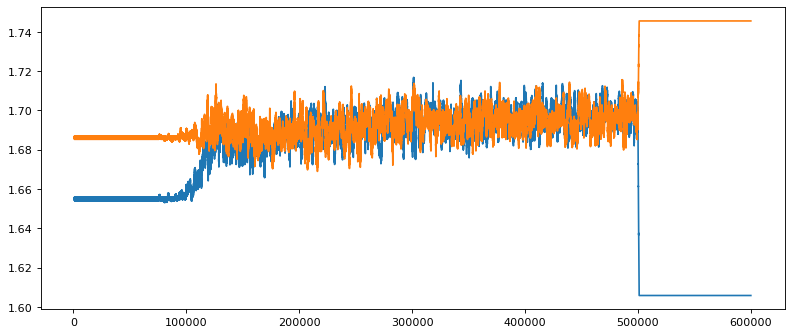

In [63]:

x =np.linspace(0,len(np.array(result.price_history)),num=len(np.array(result.price_history)))
agent_1 = np.array(result.price_history)[:,0]
agent_2 = np.array(result.price_history)[:,1]

df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.figure(figsize=(12, 5), dpi=80)
plt.plot(df['agent_1'].rolling(1000).mean())
plt.plot(df['agent_2'].rolling(1000).mean())

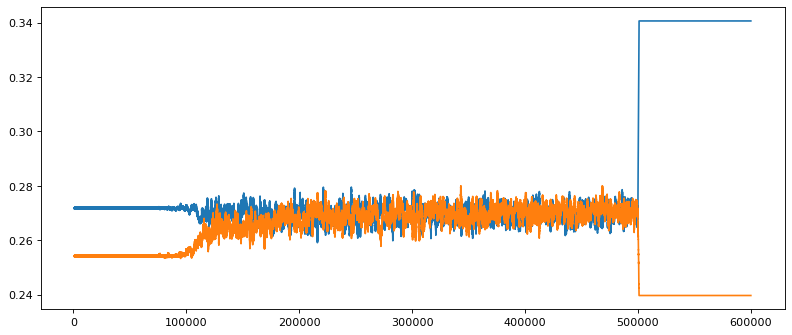

In [28]:

x =np.linspace(0,len(np.array(result.reward_history)),num=len(np.array(result.reward_history)))
agent_1 = np.array(result.reward_history)[:,0]
agent_2 = np.array(result.reward_history)[:,1]

df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.figure(figsize=(12, 5), dpi=80)
plt.plot(df['agent_1'].rolling(1000).mean())
plt.plot(df['agent_2'].rolling(1000).mean())

# Average Normalised Profits for different number of firms Box-plot

In [3]:
two_firm = []
three_firm = []
four_firm = []

for i in range(20):
    print("iteration" ,i, "num agents: 2" )
    two_firm.append(main.run(num_agents=2,alpha = 0.125,beta = 1*1e-5,temp_max = 3, temp_min = 0.0001).normalised_profits.mean())
    clear_output()
for i in range(20):
    print("iteration" ,i,"num agents: 3" )
    three_firm.append(main.run(num_agents=3,alpha = 0.125,beta = 1*1e-5,temp_max = 3, temp_min = 0.0001).normalised_profits.mean())
    clear_output()

for i in range(20):
    print("iteration" ,i,"num agents: 4" )
    four_firm.append(main.run(num_agents=4,alpha = 0.125,beta = 1*1e-5,temp_max = 3, temp_min = 0.0001).normalised_profits.mean())
    clear_output()

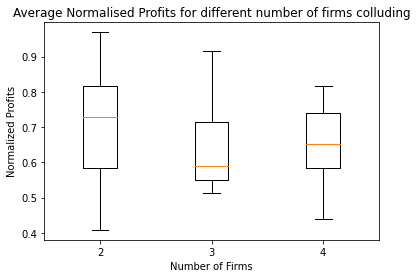

In [7]:
df = pd.DataFrame({"2":two_firm, "3":three_firm, "4":four_firm})

plt.title("Average Normalised Profits for different number of firms colluding")
plt.boxplot(df)
plt.xticks([1, 2, 3], ["2","3","4"])
plt.xlabel("Number of Firms")
plt.ylabel("Normalized Profits")
plt.show()

# Average Normalised Profits for different number of firms Box-plot using Boltzmann

In [19]:

two_firm = []
three_firm = []
four_firm = []

for i in range(10):
    two_firm.append(main.run(num_agent=2).normalised_profits.mean())
for i in range(10):
    three_firm.append(main.run(num_agent=3).normalised_profits.mean())
for i in range(10):
    four_firm.append(main.run(num_agent=4).normalised_profits.mean())

 85%|████████▍ | 846772/1000000 [04:35<00:49, 3076.92it/s]


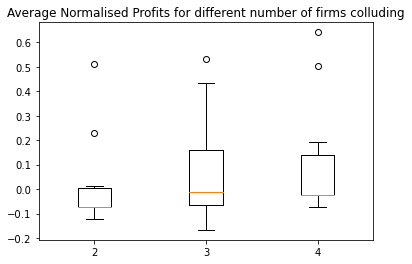

In [20]:
df = pd.DataFrame({"2":two_firm, "3":three_firm, "4":four_firm})

plt.title("Average Normalised Profits for different number of firms colluding")
plt.boxplot(df)
plt.xticks([1, 2, 3], ["2","3","4"])
plt.show()

# Heat Map of Normalised Profits for grid values of $\alpha$ and $\beta$

In [ ]:
matrix = []
for alpha in np.arange(0.01,0.2,0.01):
    lst = []
    for beta in np.arange(0.01,2,0.02):
        lst.append(main.run(alpha = alpha, beta = beta*1e-5).normalised_profits.mean())
    matrix.append(lst)

In [21]:
alpha_names = [round(alpha,2) for alpha in np.arange(0.01,0.2,0.01)]
beta_names = [round(beta,2) for beta in np.arange(0.01,2,0.02)]
num_ticks = 5
yticks = np.linspace(0, len(alpha_names) - 1, num_ticks, dtype=np.int)
yticklabels = [alpha_names[idx] for idx in yticks]

df = pd.DataFrame(matrix, index=alpha_names, columns=beta_names)
heatmap_result = sns.heatmap(df, yticklabels=yticklabels)
heatmap_result.set_yticks(yticks)
heatmap_result.invert_yaxis()

plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')
plt.title(r'Average normalised profits for a Grid of Values of $\alpha$ and $\beta$')

<ipython-input-21-1892dc5e3da0>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  yticks = np.linspace(0, len(alpha_names) - 1, num_ticks, dtype=np.int)


NameError: name 'matrix' is not defined